# **AI vs Human Content Detection**

# **Data Collection and Exploration**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Modeling & Preprocessing Import
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


# Model Tuning
from sklearn.model_selection import GridSearchCV

# For model evaluation (using Classification metrics)
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay as ROC
from sklearn import metrics

## **Loading Dataset**

In [3]:
df=pd.read_csv('ai_human_content_detection_dataset.csv')
df

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,Score each cause. Quality throughout beautiful...,academic_paper,288,1927,54,0.9514,5.33,5.69,0.0280,53.08,7.41,1,0.1041,105.86,0.5531,0.2034,1
1,Board its rock. Job worker break tonight coupl...,essay,253,1719,45,0.9723,5.62,5.80,0.0262,50.32,8.10,6,0.2045,100.29,0.5643,0.4854,1
2,Way debate decision produce. Dream necessary c...,academic_paper,420,2849,75,0.9071,5.60,5.79,0.0263,46.86,7.86,5,0.2308,96.88,0.4979,-0.2369,1
3,Story turn because such during open model. Tha...,creative_writing,196,1310,34,0.9592,5.76,5.69,0.0260,53.80,7.00,2,0.1912,88.79,0.6241,NaN,1
4,Place specific as simply leader fall analysis....,news_article,160,1115,28,0.9688,5.71,5.97,0.0251,44.53,8.29,0,0.1318,26.15,0.2894,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,Congress month from thought instead anything. ...,academic_paper,251,1677,44,0.9721,5.70,5.69,0.0262,50.72,8.02,0,0.1232,112.37,0.6893,0.2415,0
1363,Learn lead reveal great action. Left theory pa...,article,79,503,15,0.9620,5.27,5.38,0.0298,60.13,6.16,0,0.2369,111.76,0.6263,-0.8244,0
1364,Third few low hard peace paper pass front. Mea...,social_media,15,94,3,1.0000,5.00,5.33,0.0319,NaN,4.67,0,0.1296,37.37,0.2182,0.8319,0
1365,Power word west very news. Truth action base p...,blog_post,92,578,14,0.9891,6.57,5.29,0.0242,61.31,7.41,0,0.1898,46.58,0.1151,0.1486,0


In [4]:
df.head()

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,Score each cause. Quality throughout beautiful...,academic_paper,288,1927,54,0.9514,5.33,5.69,0.0280,53.08,7.41,1,0.1041,105.86,0.5531,0.2034,1
1,Board its rock. Job worker break tonight coupl...,essay,253,1719,45,0.9723,5.62,5.80,0.0262,50.32,8.10,6,0.2045,100.29,0.5643,0.4854,1
2,Way debate decision produce. Dream necessary c...,academic_paper,420,2849,75,0.9071,5.60,5.79,0.0263,46.86,7.86,5,0.2308,96.88,0.4979,-0.2369,1
3,Story turn because such during open model. Tha...,creative_writing,196,1310,34,0.9592,5.76,5.69,0.0260,53.80,7.00,2,0.1912,88.79,0.6241,NaN,1
4,Place specific as simply leader fall analysis....,news_article,160,1115,28,0.9688,5.71,5.97,0.0251,44.53,8.29,0,0.1318,26.15,0.2894,NaN,1


In [5]:
df.tail()

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
1362,Congress month from thought instead anything. ...,academic_paper,251,1677,44,0.9721,5.70,5.69,0.0262,50.72,8.02,0,0.1232,112.37,0.6893,0.2415,0
1363,Learn lead reveal great action. Left theory pa...,article,79,503,15,0.9620,5.27,5.38,0.0298,60.13,6.16,0,0.2369,111.76,0.6263,-0.8244,0
1364,Third few low hard peace paper pass front. Mea...,social_media,15,94,3,1.0000,5.00,5.33,0.0319,NaN,4.67,0,0.1296,37.37,0.2182,0.8319,0
1365,Power word west very news. Truth action base p...,blog_post,92,578,14,0.9891,6.57,5.29,0.0242,61.31,7.41,0,0.1898,46.58,0.1151,0.1486,0
1366,Beyond card must former. Leave where join kind...,blog_post,192,1270,34,0.9844,5.65,5.62,0.0268,49.09,7.88,0,0.0762,25.94,0.2506,0.8069,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text_content          1367 non-null   object 
 1   content_type          1367 non-null   object 
 2   word_count            1367 non-null   int64  
 3   character_count       1367 non-null   int64  
 4   sentence_count        1367 non-null   int64  
 5   lexical_diversity     1367 non-null   float64
 6   avg_sentence_length   1367 non-null   float64
 7   avg_word_length       1367 non-null   float64
 8   punctuation_ratio     1367 non-null   float64
 9   flesch_reading_ease   1288 non-null   float64
 10  gunning_fog_index     1332 non-null   float64
 11  grammar_errors        1367 non-null   int64  
 12  passive_voice_ratio   1336 non-null   float64
 13  predictability_score  1367 non-null   float64
 14  burstiness            1367 non-null   float64
 15  sentiment_score      

In [7]:
df.describe()

,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
count,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1288.000000,1332.000000,1367.000000,1336.000000,1367.000000,1367.000000,1313.000000,1367.000000
mean,140.190929,940.329188,25.610095,0.967646,5.486423,5.717783,0.027440,52.183377,7.556877,1.537674,0.150198,62.779049,0.427041,-0.007997,0.499634
std,97.410218,654.335255,17.867480,0.026254,0.447202,0.279636,0.002801,10.466570,1.866676,1.912012,0.056738,28.223550,0.199249,0.588354,0.500183
min,3.000000,14.000000,1.000000,0.875000,3.000000,4.000000,0.019400,-50.010000,1.200000,0.000000,0.050000,20.030000,0.101100,-0.999300,0.000000
25%,61.500000,410.500000,11.000000,0.951550,5.270000,5.590000,0.026100,47.712500,6.620000,0.000000,0.099675,39.015000,0.250000,-0.525800,0.000000
50%,131.000000,882.000000,24.000000,0.969200,5.480000,5.710000,0.027200,52.190000,7.515000,1.000000,0.151350,56.820000,0.408500,-0.006200,0.000000
75%,193.000000,1294.500000,35.000000,0.989100,5.700000,5.830000,0.028400,57.322500,8.390000,3.000000,0.200150,86.645000,0.594300,0.502800,1.000000
max,443.000000,2966.000000,83.000000,1.000000,8.000000,8.330000,0.071400,98.870000,27.870000,10.000000,0.250000,119.930000,0.799500,0.995900,1.000000


# **Data Cleaning**

In [8]:
df['flesch_reading_ease'].describe()

,flesch_reading_ease
count,1288.000000
mean,52.183377
std,10.466570
min,-50.010000
25%,47.712500
50%,52.190000
75%,57.322500
max,98.870000


In [9]:
df = df[df['flesch_reading_ease'] >= 0].copy()
df['flesch_reading_ease'].describe()

,flesch_reading_ease
count,1284.000000
mean,52.401745
std,9.665522
min,4.870000
25%,47.785000
50%,52.220000
75%,57.365000
max,98.870000


In [10]:
df.isnull().sum()

,0
text_content,0
content_type,0
word_count,0
character_count,0
sentence_count,0
lexical_diversity,0
avg_sentence_length,0
avg_word_length,0
punctuation_ratio,0
flesch_reading_ease,0


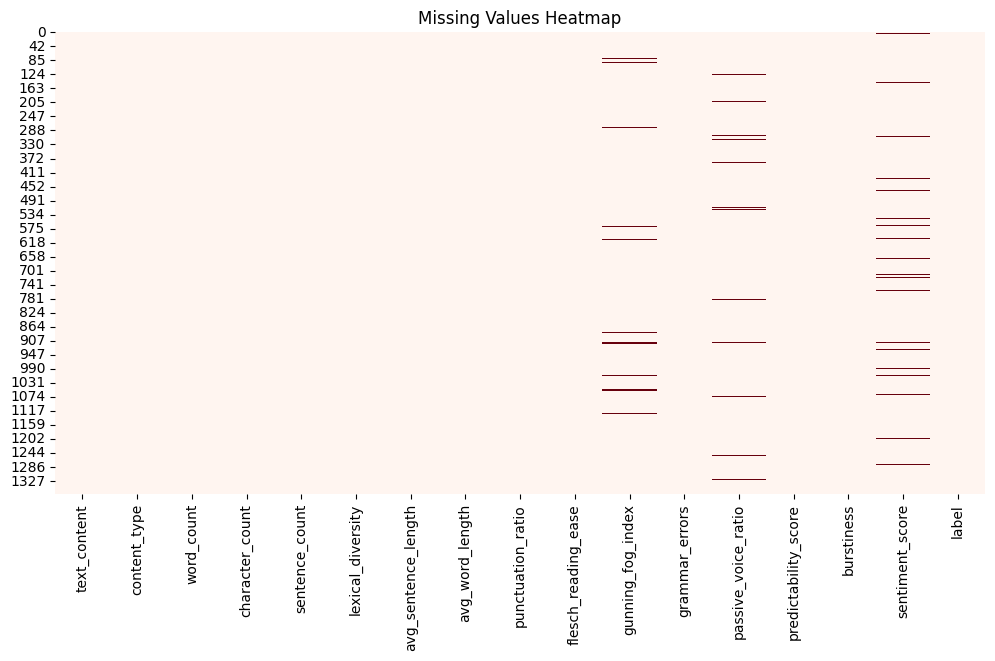

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Values Heatmap")
plt.show()

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1284 entries, 0 to 1366
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text_content          1284 non-null   object 
 1   content_type          1284 non-null   object 
 2   word_count            1284 non-null   int64  
 3   character_count       1284 non-null   int64  
 4   sentence_count        1284 non-null   int64  
 5   lexical_diversity     1284 non-null   float64
 6   avg_sentence_length   1284 non-null   float64
 7   avg_word_length       1284 non-null   float64
 8   punctuation_ratio     1284 non-null   float64
 9   flesch_reading_ease   1284 non-null   float64
 10  gunning_fog_index     1251 non-null   float64
 11  grammar_errors        1284 non-null   int64  
 12  passive_voice_ratio   1255 non-null   float64
 13  predictability_score  1284 non-null   float64
 14  burstiness            1284 non-null   float64
 15  sentiment_score       1234

# **Exploratary Data Analysis**

In [14]:
# Define key features with outlier potential
outlier_features = ['word_count', 'burstiness', 'predictability_score',
                    'passive_voice_ratio', 'gunning_fog_index']

# Calculate outlier thresholds
outlier_report = {}
for feature in outlier_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_pct = len(outliers)/len(df)*100

    outlier_report[feature] = {
        'outliers_count': len(outliers),
        'outlier_pct': outlier_pct,
        'min_val': df[feature].min(),
        'max_val': df[feature].max(),
        'examples': outliers[['content_type', feature]].head(2).values.tolist()
    }

# Display report
pd.DataFrame(outlier_report).T

,outliers_count,outlier_pct,min_val,max_val,examples
word_count,42,3.271028,3,443,"[[academic_paper, 420], [academic_paper, 425]]"
burstiness,0,0.0,0.1019,0.7995,[]
predictability_score,0,0.0,20.03,119.93,[]
passive_voice_ratio,0,0.0,0.05,0.25,[]
gunning_fog_index,63,4.906542,1.2,17.09,"[[social_media, 2.4], [social_media, 2.0]]"


In [15]:
df['content_type'].unique ()

array(['academic_paper', 'essay', 'creative_writing', 'news_article',
       'blog_post', 'article', 'social_media', 'product_review'],
      dtype=object)

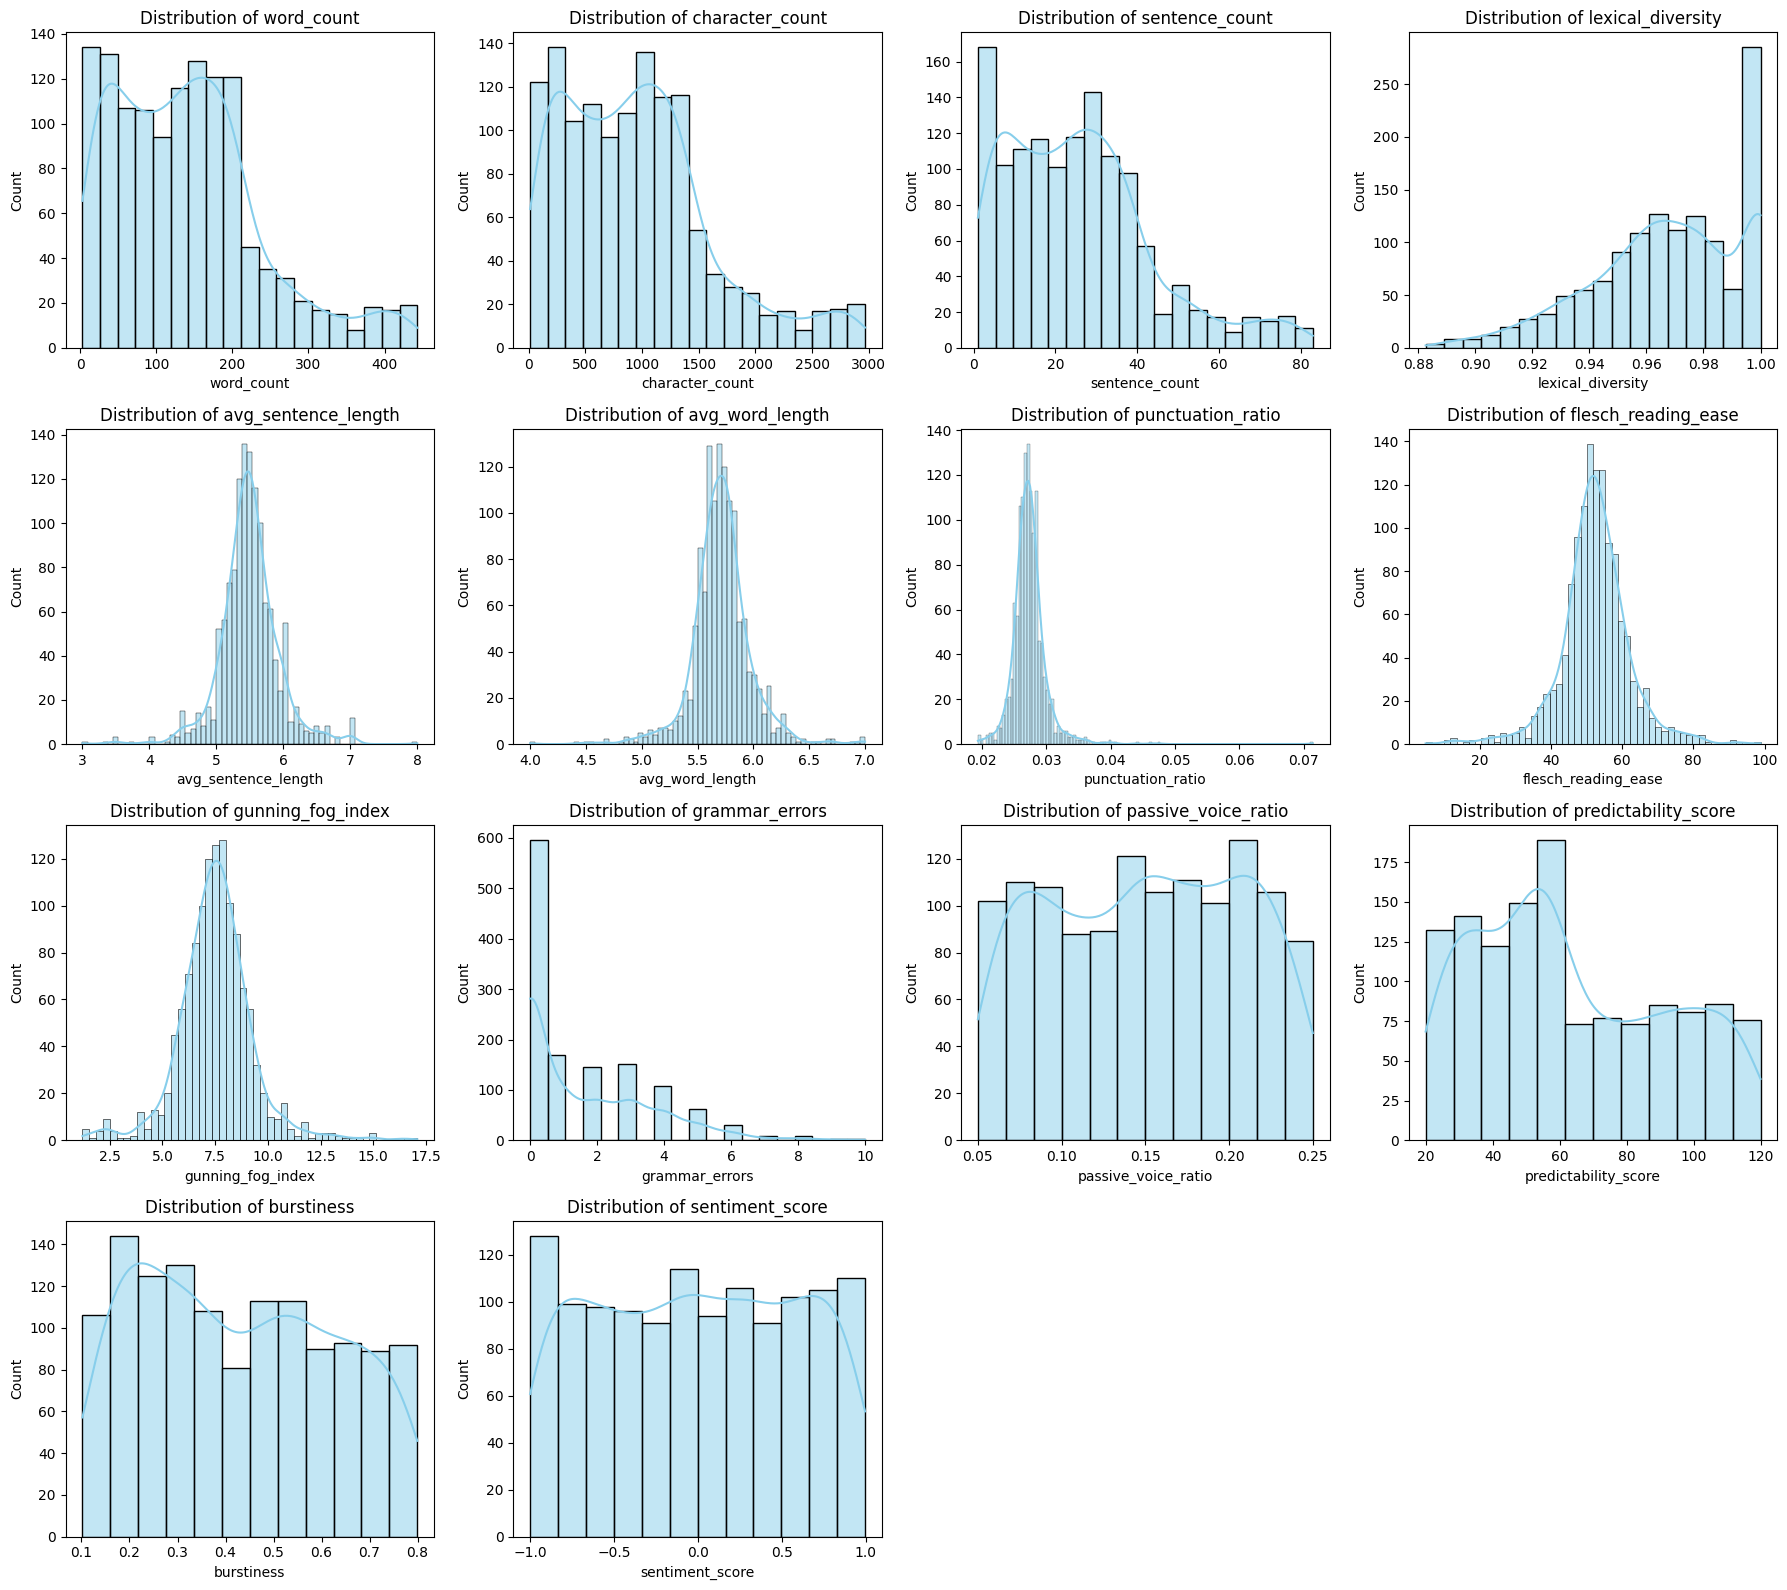

In [16]:
numerical = df.select_dtypes(include=['int64', 'float64']).drop(columns='label')

# Histograms
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 16))
axes = axes.flatten()

for i, col in enumerate(numerical.columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')

for j in range(len(numerical.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

/tmp/ipython-input-3237447720.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='content_type', data=df, order=df['content_type'].value_counts().index,


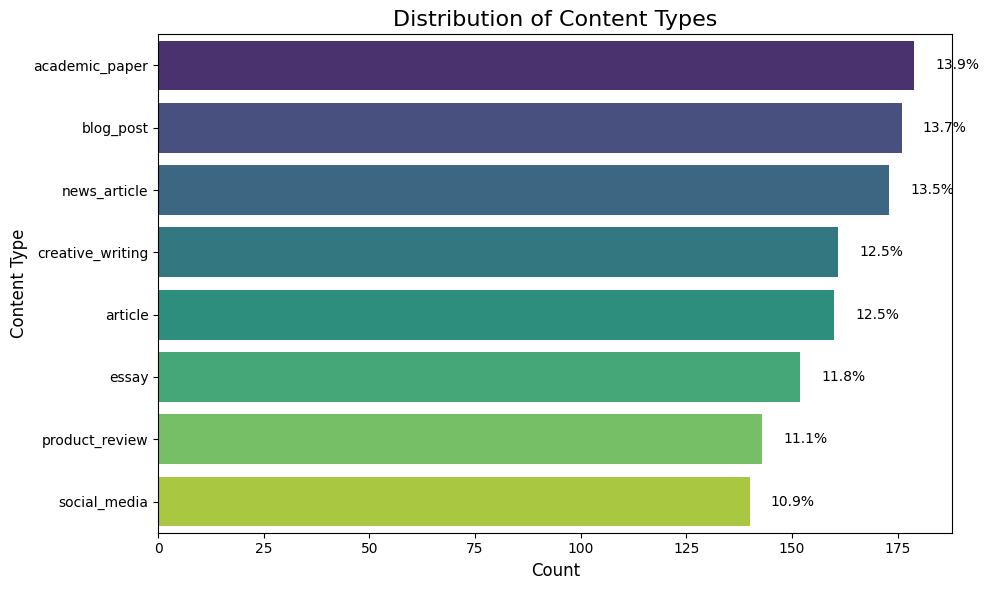

In [17]:
# Countplot of content types
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='content_type', data=df, order=df['content_type'].value_counts().index,
                  palette='viridis')
plt.title('Distribution of Content Types', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Content Type', fontsize=12)

# Add percentages
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_width()/total:.1f}%'
    x = p.get_width() + 5
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y), va='center')

plt.tight_layout()
plt.savefig('content_distribution.png', bbox_inches='tight')
plt.show()

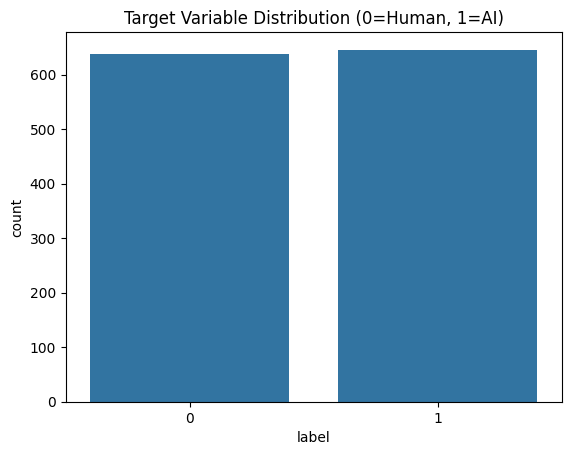

In [18]:
sns.countplot(data=df, x='label')
plt.title("Target Variable Distribution (0=Human, 1=AI)")
plt.show()

## Bivariate / Multivariate Analysis

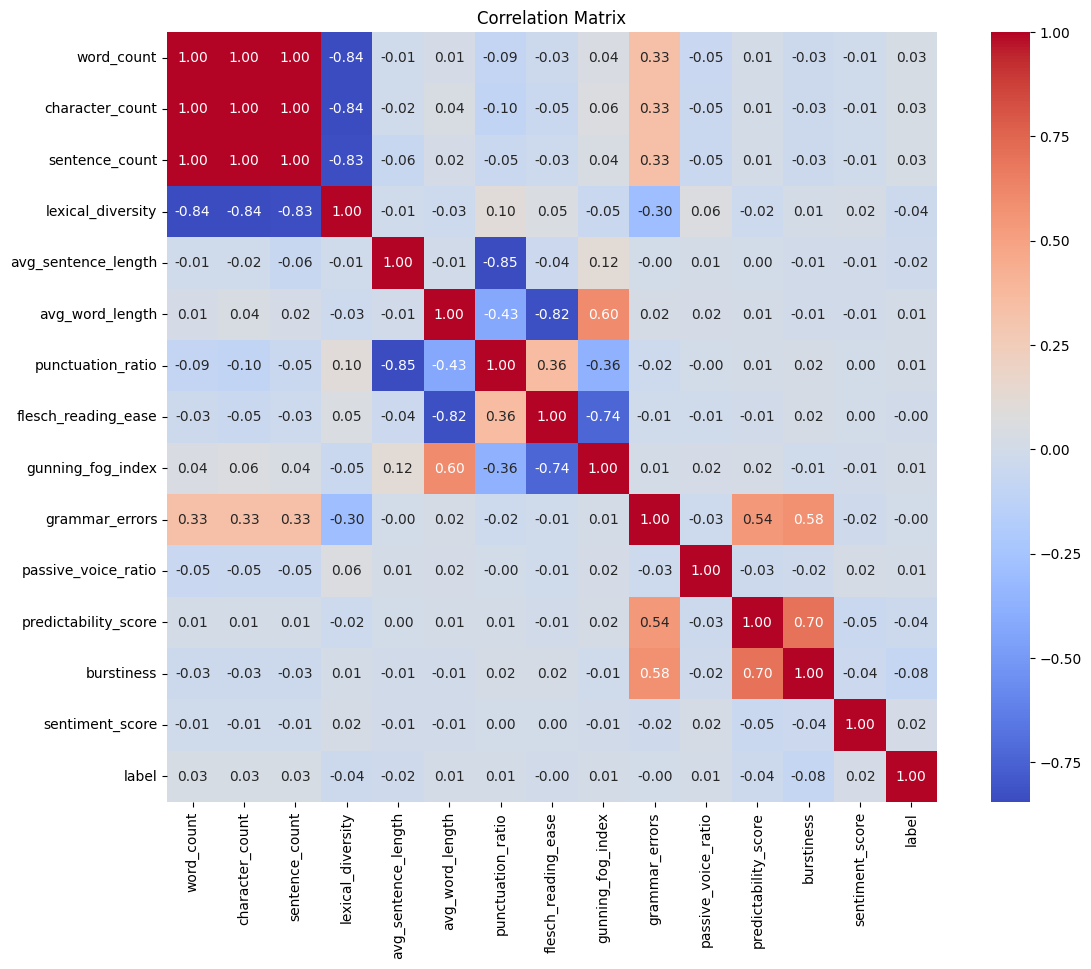

In [19]:
plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

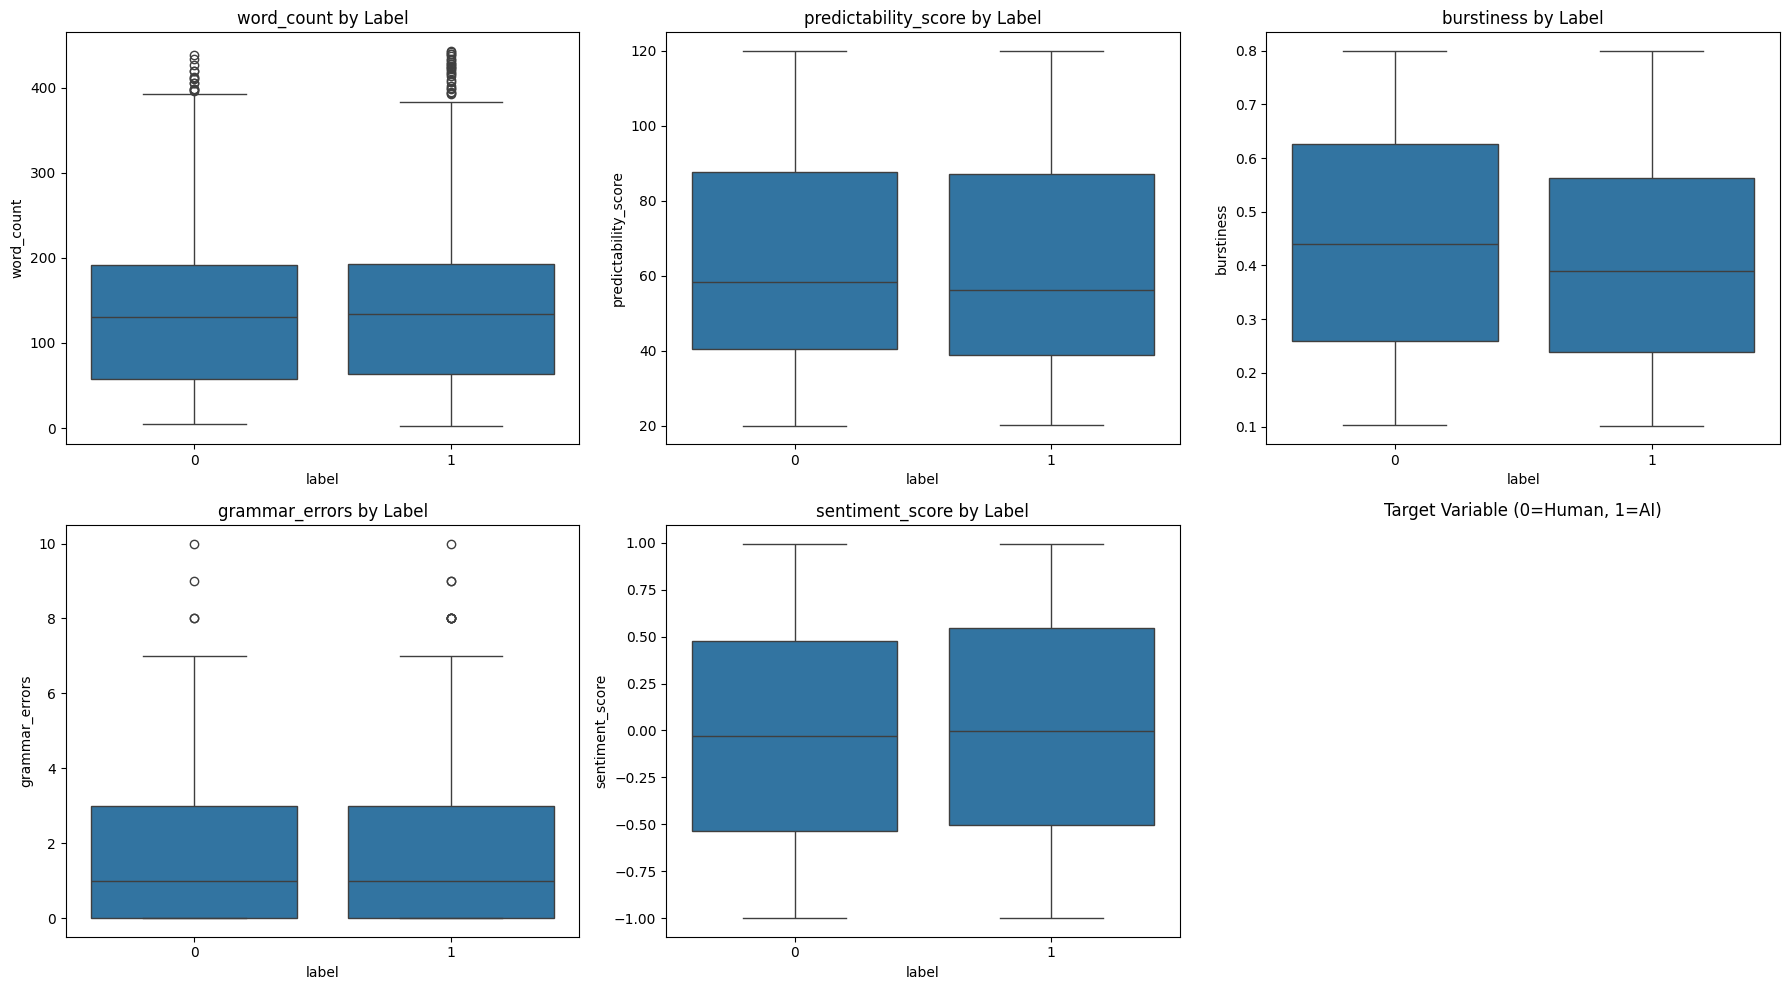

In [20]:
features_to_plot = ['word_count', 'predictability_score', 'burstiness', 'grammar_errors', 'sentiment_score']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(features_to_plot):
    sns.boxplot(data=df, x='label', y=col, ax=axes[i])
    axes[i].set_title(f"{col} by Label")

axes[-1].axis("off")
plt.title("Target Variable (0=Human, 1=AI)")
plt.tight_layout()
plt.show()

In [21]:
df['source'] = df['label'].map({1: 'AI', 0: 'Human'})

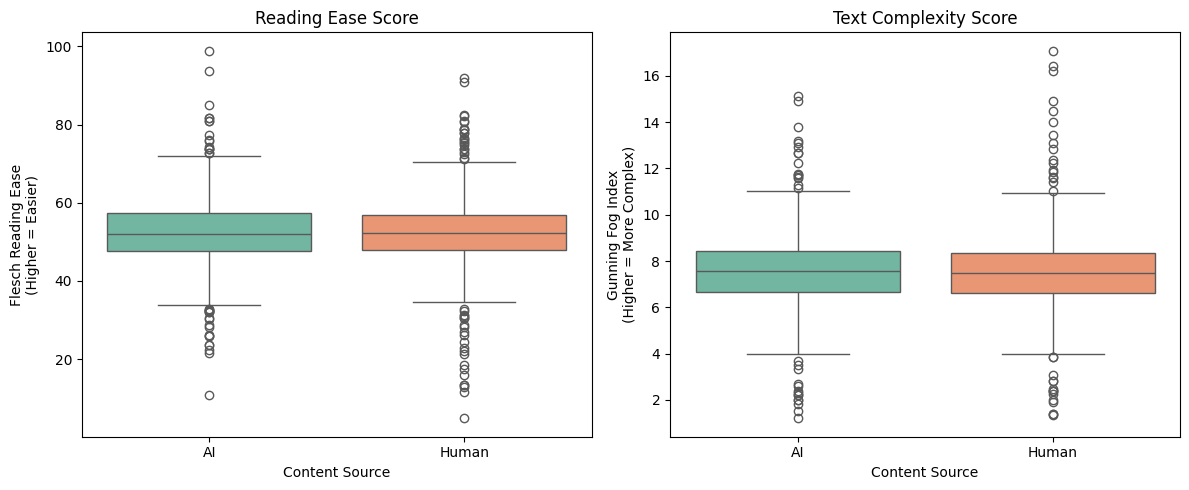

In [22]:
readability_df = df[['flesch_reading_ease', 'gunning_fog_index', 'source']].dropna()

plt.figure(figsize=(12, 5))

# First plot
plt.subplot(1, 2, 1)
sns.boxplot(x='source', y='flesch_reading_ease', data=readability_df,
            hue='source', palette='Set2')
plt.title('Reading Ease Score')
plt.xlabel('Content Source')
plt.ylabel('Flesch Reading Ease\n(Higher = Easier)')
plt.legend([],[], frameon=False)  # Remove legend
# Second plot
plt.subplot(1, 2, 2)
sns.boxplot(x='source', y='gunning_fog_index', data=readability_df,
            hue='source', palette='Set2')
plt.title('Text Complexity Score')
plt.xlabel('Content Source')
plt.ylabel('Gunning Fog Index\n(Higher = More Complex)')
plt.legend([],[], frameon=False)  # Remove legend

plt.tight_layout()
plt.savefig('readability_comparison.png')
plt.show()

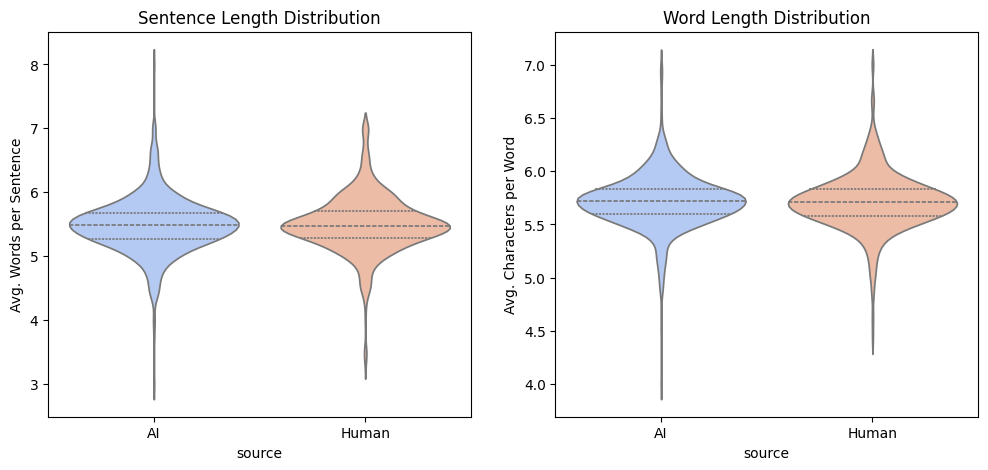

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.violinplot(x='source', y='avg_sentence_length', data=df,
              hue='source', palette='coolwarm', inner='quartile', legend=False)
plt.title('Sentence Length Distribution')
plt.ylabel('Avg. Words per Sentence')

plt.subplot(1, 2, 2)
sns.violinplot(x='source', y='avg_word_length', data=df,
              hue='source', palette='coolwarm', inner='quartile', legend=False)
plt.title('Word Length Distribution')
plt.ylabel('Avg. Characters per Word')

plt.savefig('structural_differences.png')
plt.show()

Text(0, 0.5, 'Lexical Diversity Score\n(Higher = More Diverse)')

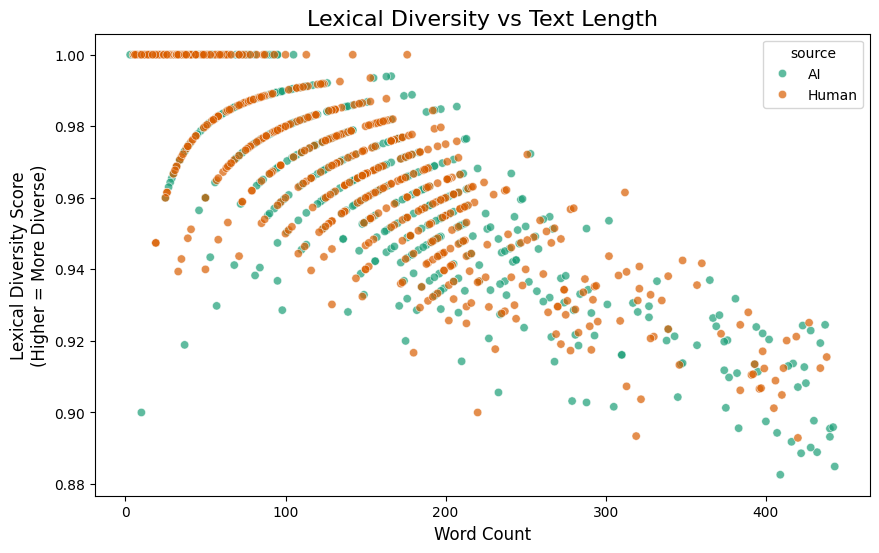

In [24]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='word_count', y='lexical_diversity', hue='source',
                          data=df, alpha=0.7, palette='Dark2')
plt.title('Lexical Diversity vs Text Length', fontsize=16)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Lexical Diversity Score\n(Higher = More Diverse)', fontsize=12)

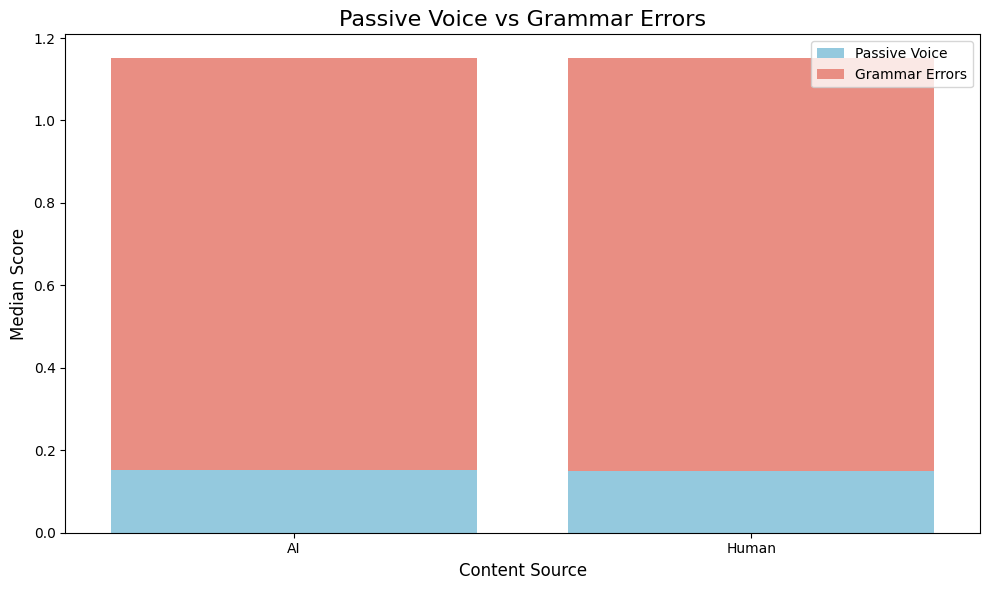

In [25]:
# Prepare data
grammar_df = df.groupby('source').agg(
    passive_ratio=('passive_voice_ratio', 'median'),
    grammar_errors=('grammar_errors', 'median')
).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='source', y='passive_ratio', data=grammar_df, color='skyblue', label='Passive Voice')
sns.barplot(x='source', y='grammar_errors', data=grammar_df, color='salmon', label='Grammar Errors',
            bottom=grammar_df['passive_ratio'])
plt.title('Passive Voice vs Grammar Errors', fontsize=16)
plt.ylabel('Median Score', fontsize=12)
plt.xlabel('Content Source', fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('grammar_passive.png')
plt.show()

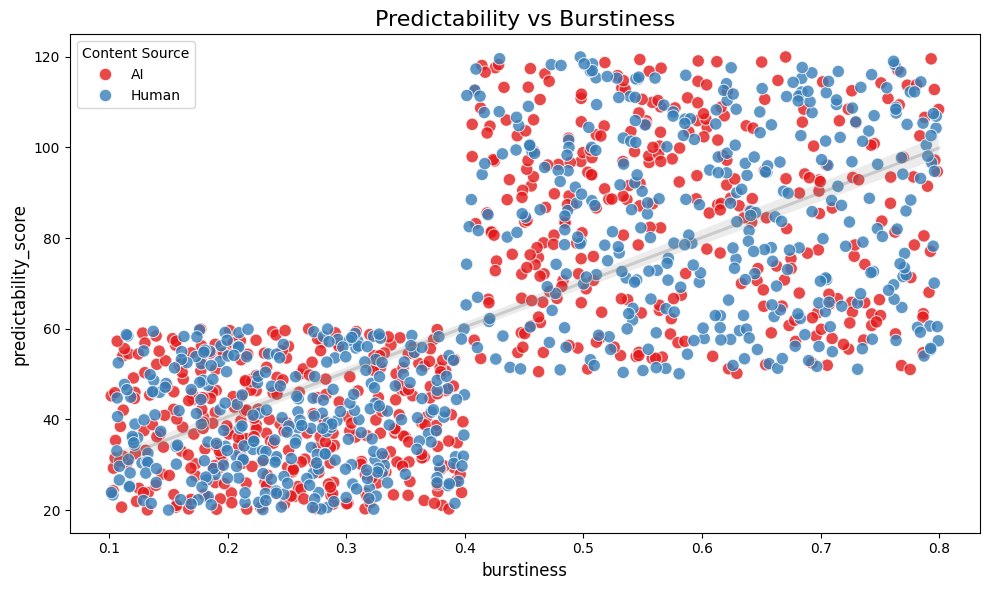

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='burstiness', y='predictability_score', hue='source',
                data=df, palette='Set1', alpha=0.8, s=80)
plt.title('Predictability vs Burstiness', fontsize=16)
plt.xlabel('Burstiness\n(Lower = More Uniform)', fontsize=12)
plt.ylabel('Predictability Score\n(Higher = More Predictable)', fontsize=12)

# Add correlation line
sns.regplot(x='burstiness', y='predictability_score', data=df,
            scatter=False, color='gray', line_kws={'alpha':0.3})

plt.legend(title='Content Source')
plt.tight_layout()
plt.savefig('predictability_burstiness.png')
plt.show()

## Feature Engineering

In [27]:
# Prepare X and y
X = df.drop(columns=['character_count','text_content', 'source','label'])
y = df['label']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Defining a list of features for both the categorical and the numerical columns

cat_feature = make_column_selector(dtype_include='object')   # Creating a categorical data selector
num_feature = make_column_selector(dtype_include='number')   # Creating a numeric data selector

# Instantiating the Transformers

impute_cat = SimpleImputer(strategy='most_frequent')
impute_num = SimpleImputer(strategy='median')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')   # It is a numinal column with no order to it => So I used the One-hot encoding
scaler = StandardScaler()

# Making pipelines for each category

pip_cat = make_pipeline(impute_cat, ohe_encoder)
pip_num = make_pipeline(impute_num, scaler)

# Defining a tuple for each pathway

categorical_tup = ('Categorical', pip_cat, cat_feature)
numerical_tup = ('Numerical', pip_num, num_feature)

# Instantiating the ColumnTransformer

col_transformer = ColumnTransformer([numerical_tup, categorical_tup], verbose_feature_names_out=False)
col_transformer.fit(X_train)
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

## Modeling

In [29]:
# Define a function that takes in arguments and prints out a classification report, confusion matrix and ROC AUC
def evaluate_classification(model, X_test, y_test, cmap=None,
                            normalize='true', classes=None, figsize=(20,5)):
  test_preds = model.predict(X_test)
  print(metrics.classification_report(y_test, test_preds, target_names=classes))

  fig, ax = plt.subplots(ncols=2, figsize=figsize)
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Greens',
                                        display_labels=classes,
                                        ax=ax[0])

  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues',
                                        display_labels=classes, normalize='true',
                                        ax=ax[1])

  fpr, tpr, thresholds = metrics.roc_curve(y_test, test_preds)
  roc_auc = metrics.auc(fpr, tpr)

  curve = ROC(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
  curve.plot()
  plt.legend()
  plt.show()

In [ ]:
models_top_features = {
    'Logistic Regression (Top Features)': LogisticRegression(random_state=42),
    'Random Forest (Top Features)': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors (Top Features)': KNeighborsClassifier(),
    'XGBoost (Top Features)': XGBClassifier(random_state=42),
    'LGBM (Top Features)': LGBMClassifier(random_state=42)
}

for name, model in models_top_features.items():
    print(f"Training and evaluating {name}...")
    model.fit(X_train_processed, y_train)
    print(f"\n{name} Evaluation:")
    evaluate_classification(model,X_test_processed, y_test)
    print("-" * 50)

Training and evaluating Logistic Regression (Top Features)...

Logistic Regression (Top Features) Evaluation:
              precision    recall  f1-score   support

           0       0.43      0.44      0.43       121
           1       0.49      0.48      0.48       136

    accuracy                           0.46       257
   macro avg       0.46      0.46      0.46       257
weighted avg       0.46      0.46      0.46       257



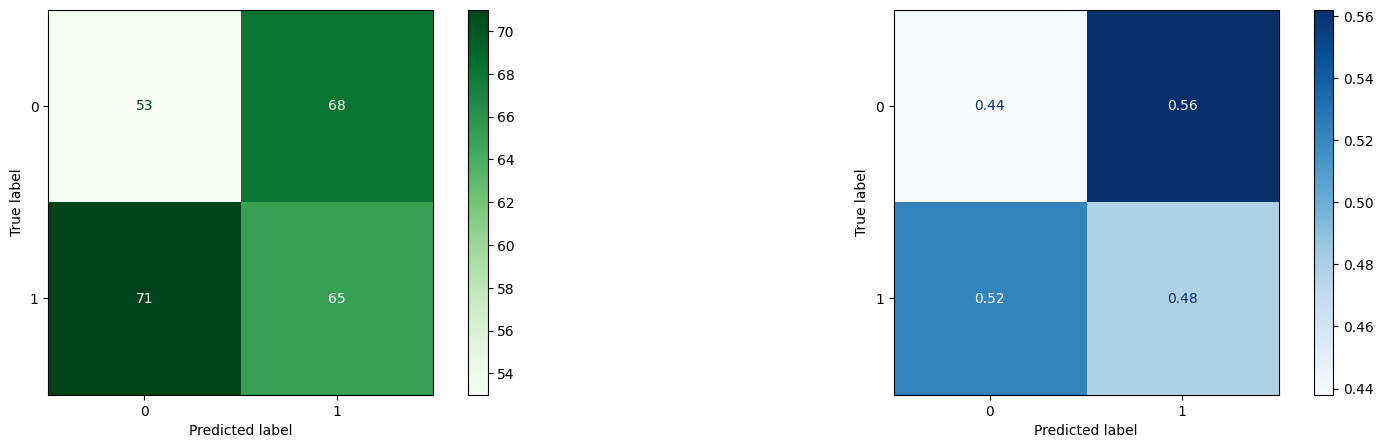

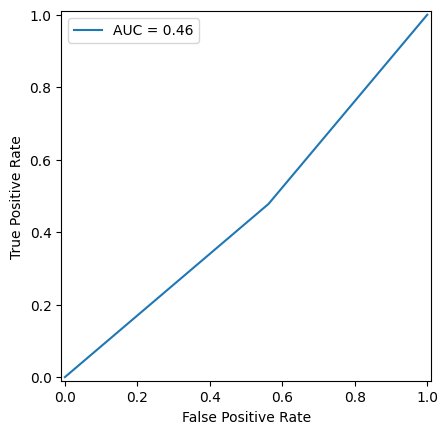

--------------------------------------------------
Training and evaluating Random Forest (Top Features)...

Random Forest (Top Features) Evaluation:
              precision    recall  f1-score   support

           0       0.49      0.59      0.53       121
           1       0.55      0.46      0.50       136

    accuracy                           0.52       257
   macro avg       0.52      0.52      0.52       257
weighted avg       0.52      0.52      0.52       257



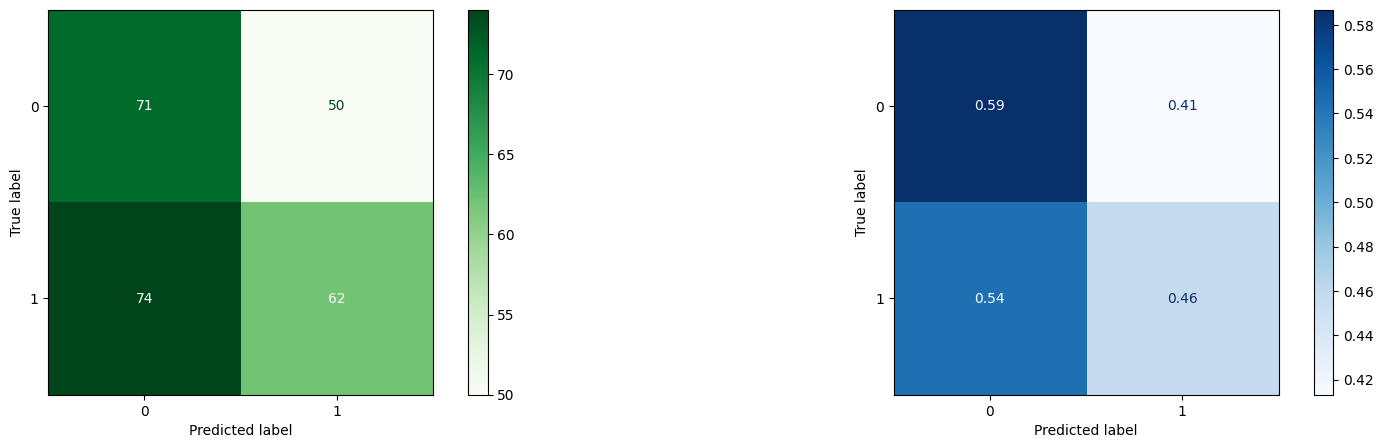

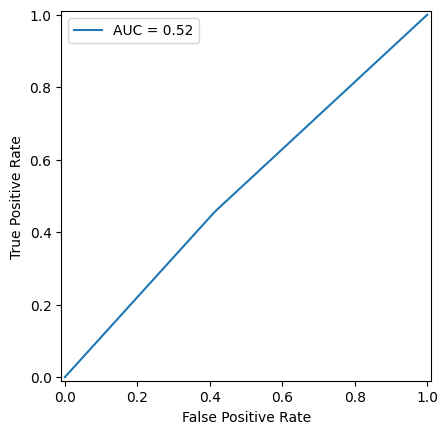

--------------------------------------------------
Training and evaluating K-Nearest Neighbors (Top Features)...

K-Nearest Neighbors (Top Features) Evaluation:
              precision    recall  f1-score   support

           0       0.44      0.50      0.47       121
           1       0.50      0.44      0.47       136

    accuracy                           0.47       257
   macro avg       0.47      0.47      0.47       257
weighted avg       0.47      0.47      0.47       257



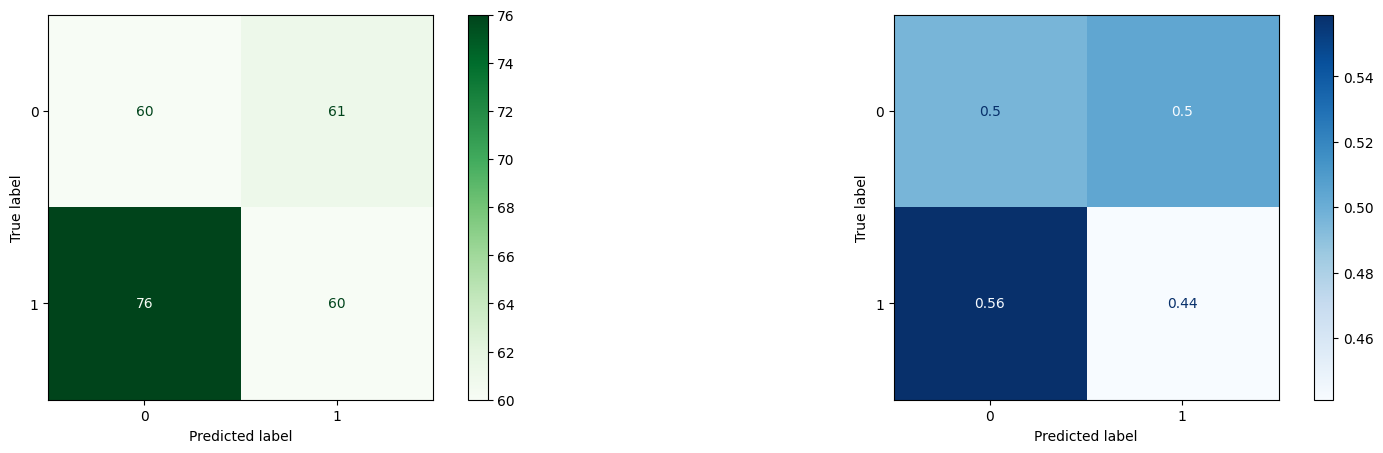

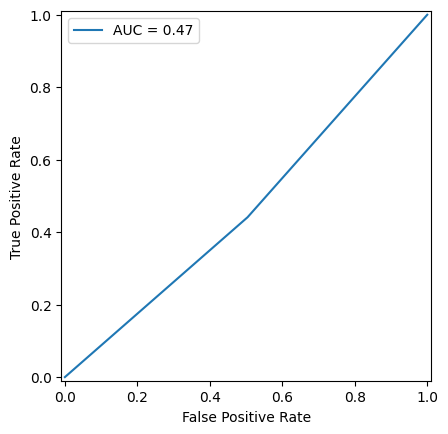

--------------------------------------------------
Training and evaluating XGBoost (Top Features)...

XGBoost (Top Features) Evaluation:
              precision    recall  f1-score   support

           0       0.47      0.55      0.50       121
           1       0.53      0.45      0.48       136

    accuracy                           0.49       257
   macro avg       0.50      0.50      0.49       257
weighted avg       0.50      0.49      0.49       257



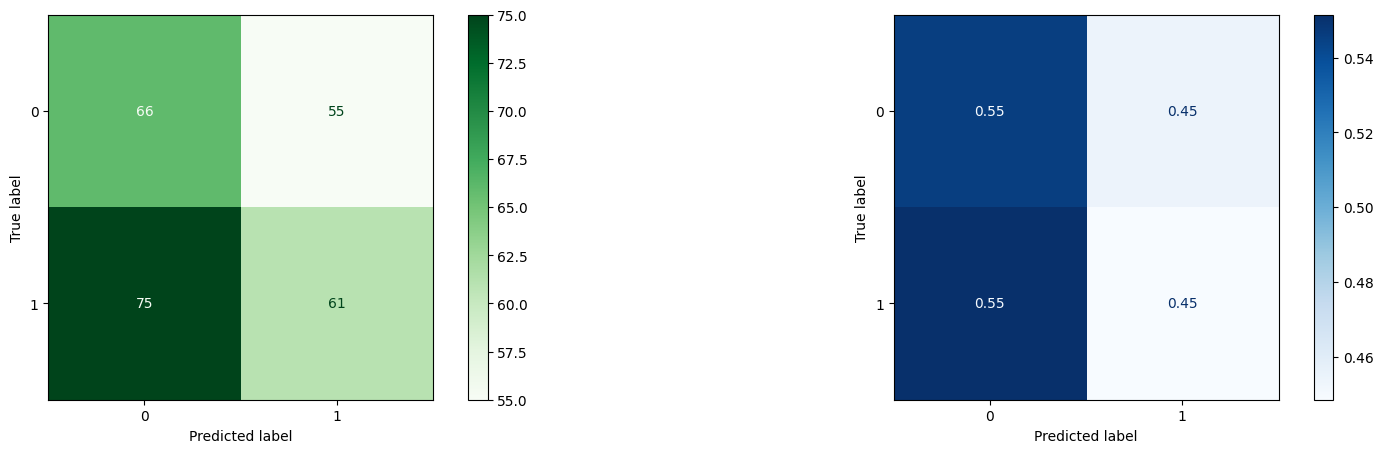

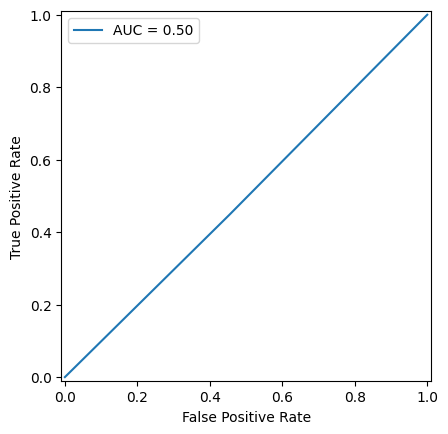

--------------------------------------------------
Training and evaluating LGBM (Top Features)...
[LightGBM] [Info] Number of positive: 510, number of negative: 517
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2452
[LightGBM] [Info] Number of data points in the train set: 1027, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496592 -> initscore=-0.013632
[LightGBM] [Info] Start training from score -0.013632

LGBM (Top Features) Evaluation:
              precision    recall  f1-score   support

           0       0.44      0.51      0.48       121
           1       0.50      0.43      0.46       136

    accuracy                           0.47       257
   macro avg       0.47      0.47      0.47       257
weighted avg       0.47      0.47      0.47 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


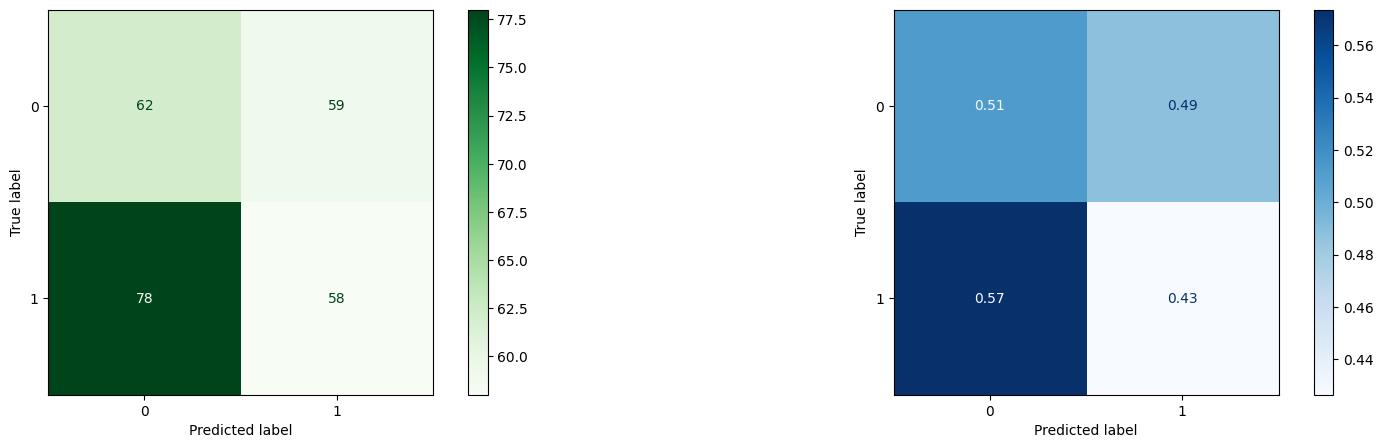

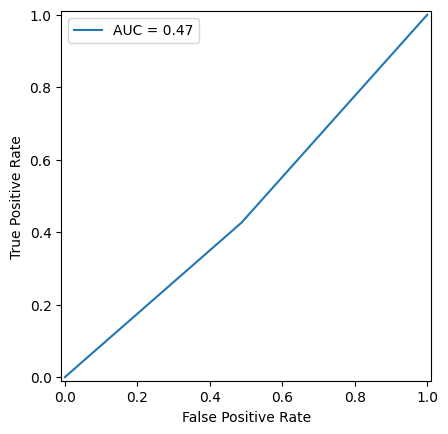

--------------------------------------------------


In [30]:
models_top_features = {
    'Logistic Regression (Top Features)': LogisticRegression(random_state=42),
    'Random Forest (Top Features)': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors (Top Features)': KNeighborsClassifier(),
    'XGBoost (Top Features)': XGBClassifier(random_state=42),
    'LGBM (Top Features)': LGBMClassifier(random_state=42)
}

for name, model in models_top_features.items():
    print(f"Training and evaluating {name}...")
    model.fit(X_train_processed, y_train)
    print(f"\n{name} Evaluation:")
    evaluate_classification(model,X_test_processed, y_test)
    print("-" * 50)

Tuning Logistic Regression (Top Features)...
Best parameters for Logistic Regression (Top Features): {'C': 0.01, 'penalty': 'l2'}
Best cross-validation score for Logistic Regression (Top Features): 0.5142
--------------------------------------------------
Tuning Random Forest (Top Features)...
Best parameters for Random Forest (Top Features): {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score for Random Forest (Top Features): 0.5200
--------------------------------------------------
Tuning K-Nearest Neighbors (Top Features)...
Best parameters for K-Nearest Neighbors (Top Features): {'n_neighbors': 5, 'weights': 'uniform'}
Best cross-validation score for K-Nearest Neighbors (Top Features): 0.5229
--------------------------------------------------
Tuning XGBoost (Top Features)...
Best parameters for XGBoost (Top Features): {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Best cross-validation score for XGBoost (Top Features): 0.5161
----

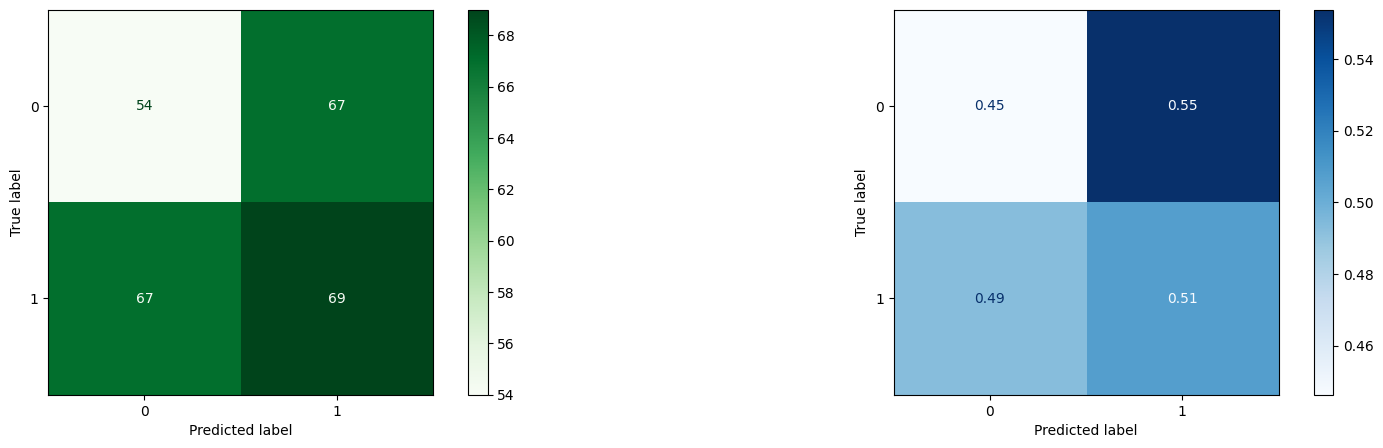

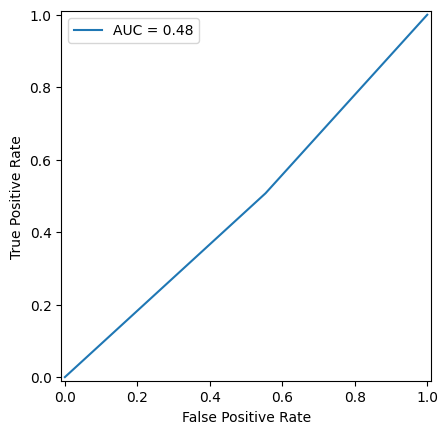

--------------------------------------------------

Random Forest (Top Features) Evaluation:
              precision    recall  f1-score   support

           0       0.49      0.60      0.54       121
           1       0.56      0.46      0.50       136

    accuracy                           0.52       257
   macro avg       0.53      0.53      0.52       257
weighted avg       0.53      0.52      0.52       257



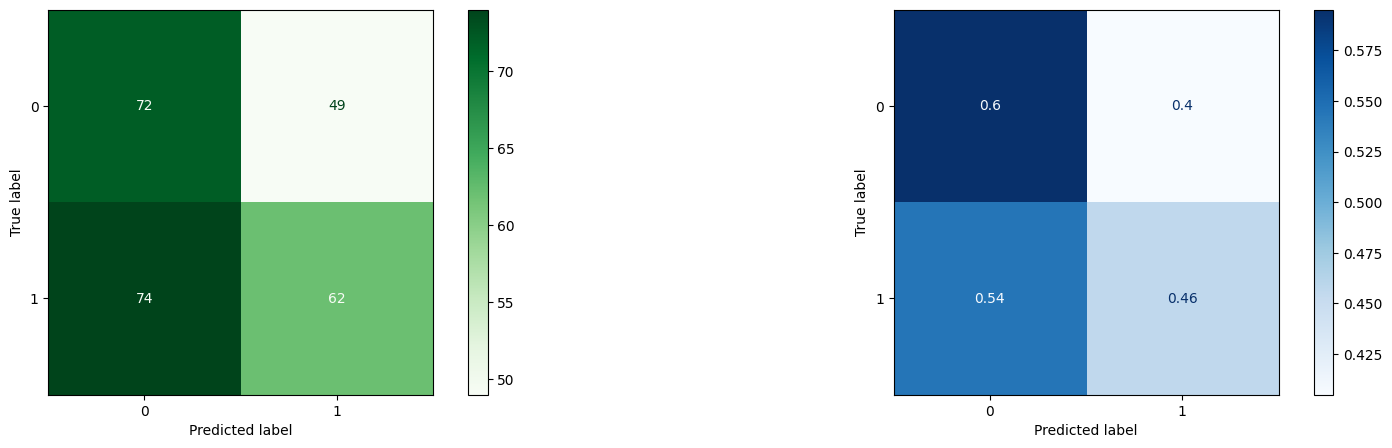

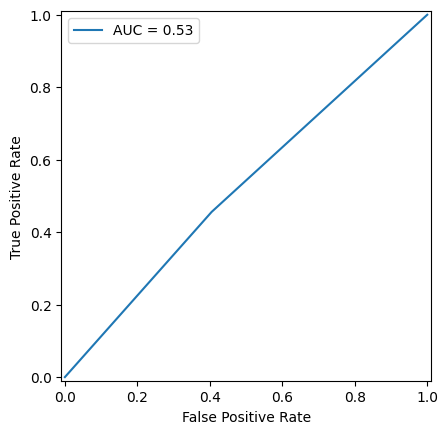

--------------------------------------------------

K-Nearest Neighbors (Top Features) Evaluation:
              precision    recall  f1-score   support

           0       0.44      0.50      0.47       121
           1       0.50      0.44      0.47       136

    accuracy                           0.47       257
   macro avg       0.47      0.47      0.47       257
weighted avg       0.47      0.47      0.47       257



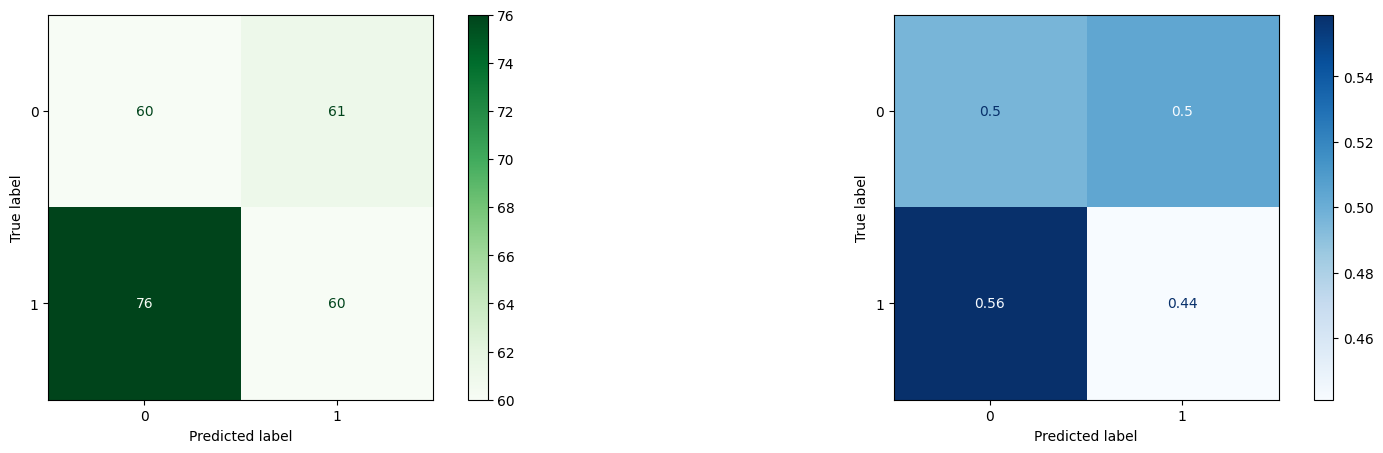

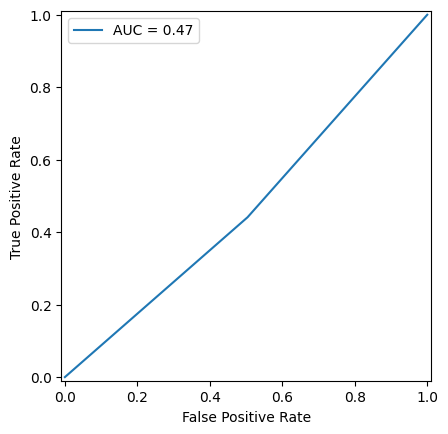

--------------------------------------------------

XGBoost (Top Features) Evaluation:
              precision    recall  f1-score   support

           0       0.45      0.54      0.49       121
           1       0.51      0.43      0.46       136

    accuracy                           0.48       257
   macro avg       0.48      0.48      0.48       257
weighted avg       0.48      0.48      0.48       257



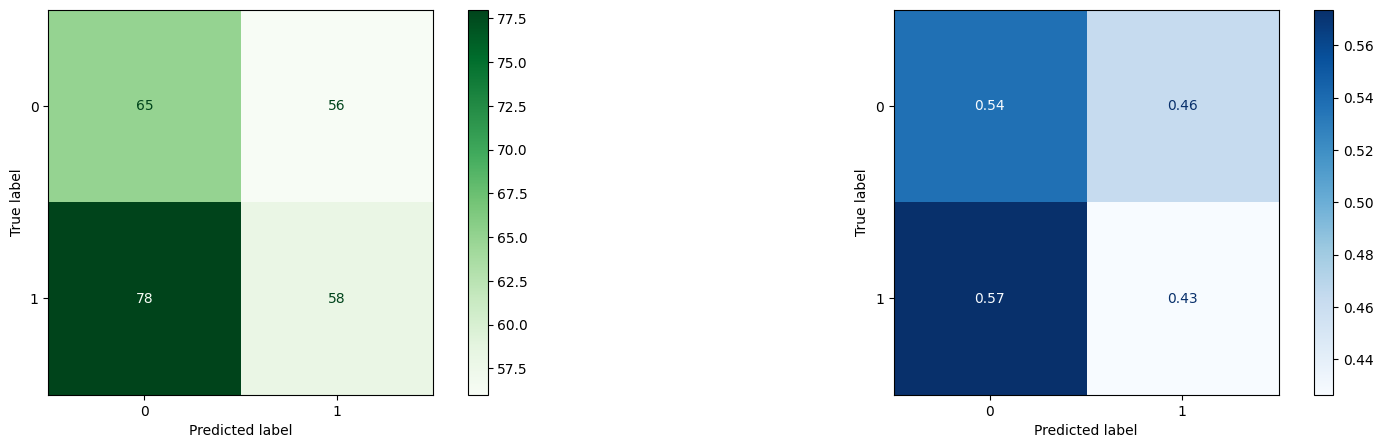

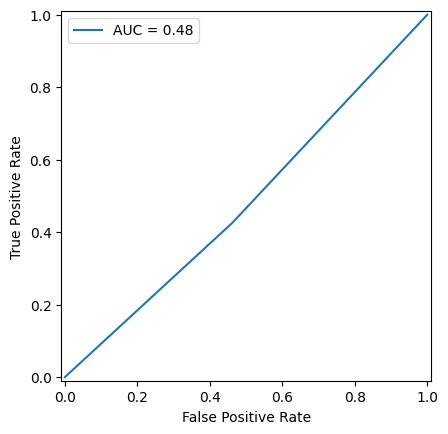

--------------------------------------------------

LGBM (Top Features) Evaluation:
              precision    recall  f1-score   support

           0       0.48      0.54      0.51       121
           1       0.54      0.48      0.51       136

    accuracy                           0.51       257
   macro avg       0.51      0.51      0.51       257
weighted avg       0.51      0.51      0.51       257



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


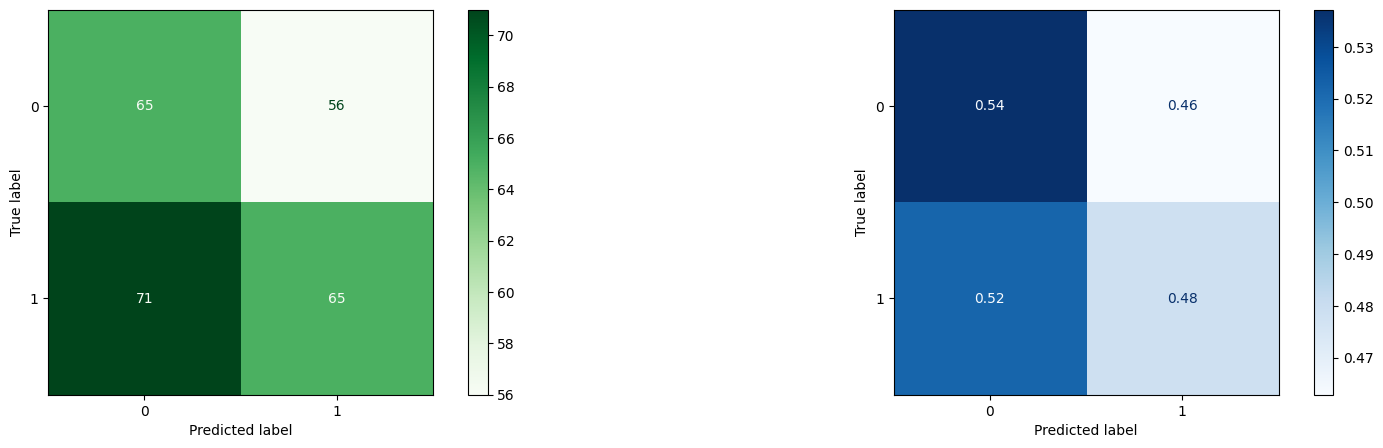

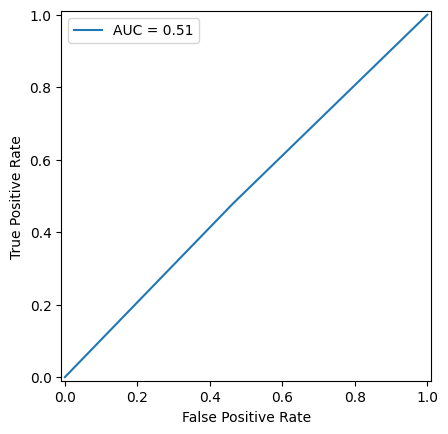

--------------------------------------------------


In [31]:
# Define parameter grids for each model
param_grids = {
    'Logistic Regression (Top Features)': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l2']
    },
    'Random Forest (Top Features)': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'K-Nearest Neighbors (Top Features)': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'XGBoost (Top Features)': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'LGBM (Top Features)': {
        'verbosity': [-1],
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 63, 127]
    }
}

# Perform GridSearchCV for each model
tuned_models = {}
for name, model in models_top_features.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_processed, y_train)
    tuned_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {name}: {grid_search.best_score_:.4f}")
    print("-" * 50)
    import warnings
warnings.filterwarnings('ignore', message='.*No further splits with positive gain.*')

# Evaluate the tuned models
print("\nEvaluating Tuned Models:")
for name, model in tuned_models.items():
    print(f"\n{name} Evaluation:")
    evaluate_classification(model, X_test_processed, y_test)
    print("-" * 50)

Tuning Logistic Regression (Top Features)...
Best parameters for Logistic Regression (Top Features): {'C': 0.01, 'penalty': 'l2'}
Best cross-validation score for Logistic Regression (Top Features): 0.5142
--------------------------------------------------
Tuning Random Forest (Top Features)...
Best parameters for Random Forest (Top Features): {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score for Random Forest (Top Features): 0.5200
--------------------------------------------------
Tuning K-Nearest Neighbors (Top Features)...
Best parameters for K-Nearest Neighbors (Top Features): {'n_neighbors': 5, 'weights': 'uniform'}
Best cross-validation score for K-Nearest Neighbors (Top Features): 0.5229
--------------------------------------------------
Tuning XGBoost (Top Features)...
Best parameters for XGBoost (Top Features): {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Best cross-validation score for XGBoost (Top Features): 0.5161
----

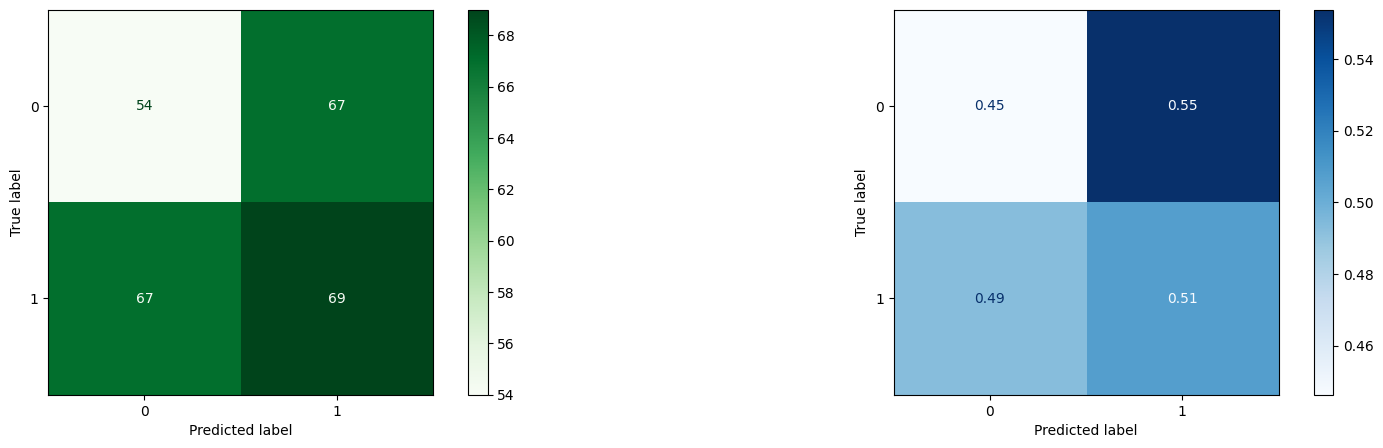

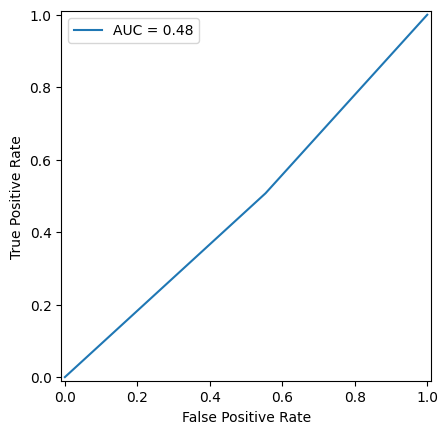

--------------------------------------------------

Random Forest (Top Features) Evaluation:
              precision    recall  f1-score   support

           0       0.49      0.60      0.54       121
           1       0.56      0.46      0.50       136

    accuracy                           0.52       257
   macro avg       0.53      0.53      0.52       257
weighted avg       0.53      0.52      0.52       257



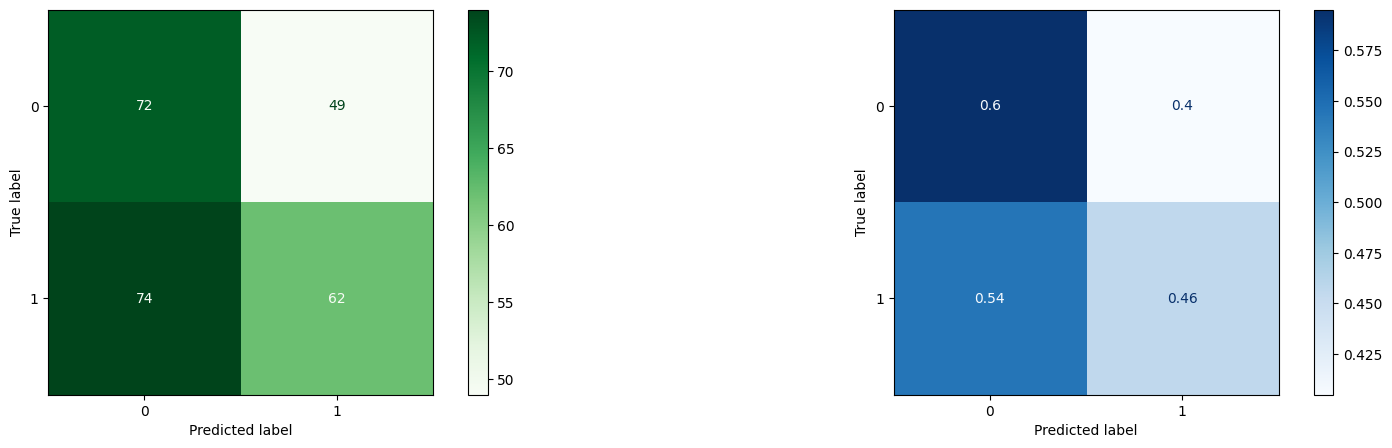

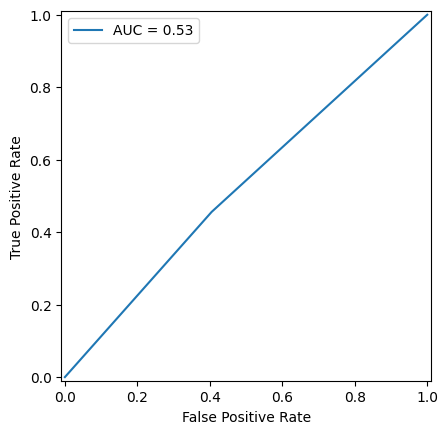

--------------------------------------------------

K-Nearest Neighbors (Top Features) Evaluation:
              precision    recall  f1-score   support

           0       0.44      0.50      0.47       121
           1       0.50      0.44      0.47       136

    accuracy                           0.47       257
   macro avg       0.47      0.47      0.47       257
weighted avg       0.47      0.47      0.47       257



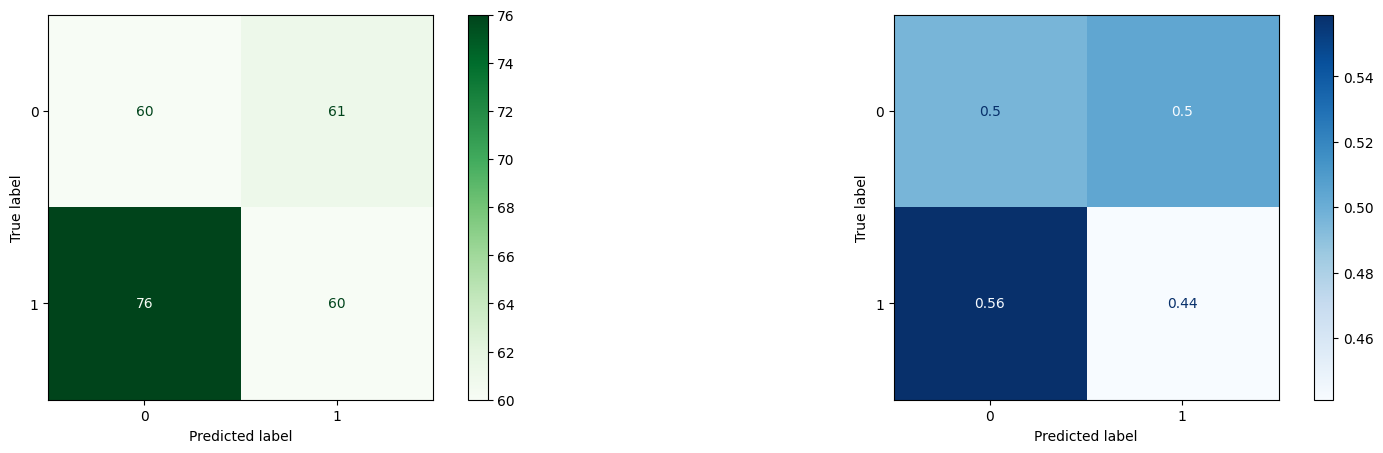

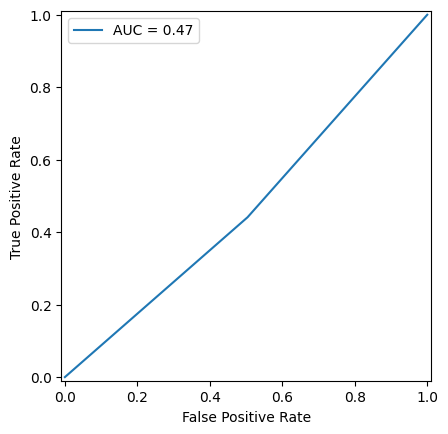

--------------------------------------------------

XGBoost (Top Features) Evaluation:
              precision    recall  f1-score   support

           0       0.45      0.54      0.49       121
           1       0.51      0.43      0.46       136

    accuracy                           0.48       257
   macro avg       0.48      0.48      0.48       257
weighted avg       0.48      0.48      0.48       257



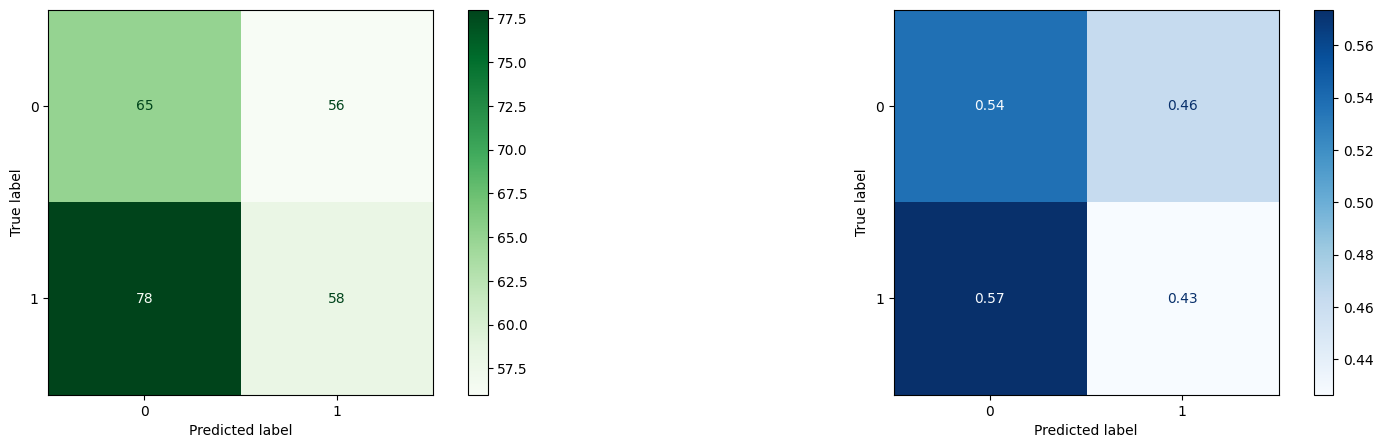

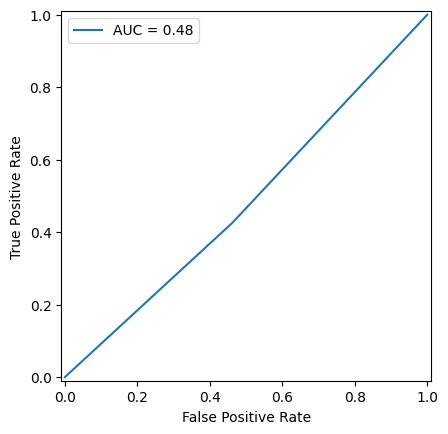

--------------------------------------------------

LGBM (Top Features) Evaluation:
              precision    recall  f1-score   support

           0       0.48      0.54      0.51       121
           1       0.54      0.48      0.51       136

    accuracy                           0.51       257
   macro avg       0.51      0.51      0.51       257
weighted avg       0.51      0.51      0.51       257



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


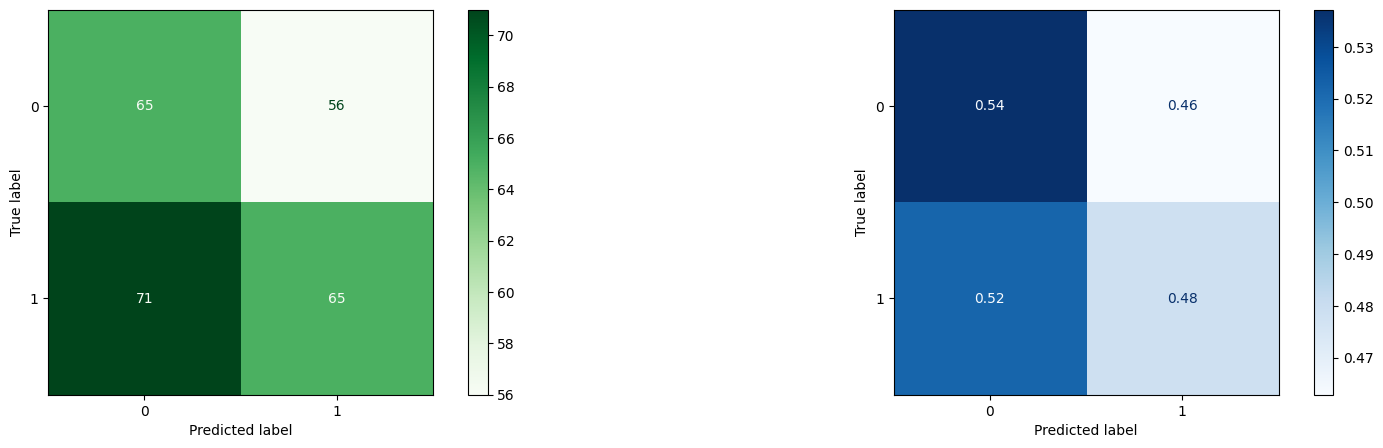

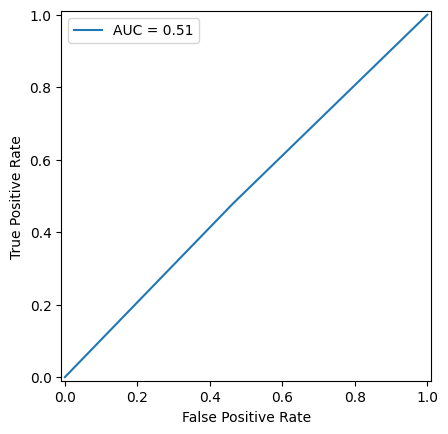

--------------------------------------------------


In [32]:
# Define parameter grids for each model
param_grids = {
    'Logistic Regression (Top Features)': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l2']
    },
    'Random Forest (Top Features)': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'K-Nearest Neighbors (Top Features)': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'XGBoost (Top Features)': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'LGBM (Top Features)': {
        'verbosity': [-1],
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 63, 127]
    }
}

# Perform GridSearchCV for each model
tuned_models = {}
for name, model in models_top_features.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_processed, y_train)
    tuned_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {name}: {grid_search.best_score_:.4f}")
    print("-" * 50)
    import warnings
warnings.filterwarnings('ignore', message='.*No further splits with positive gain.*')

# Evaluate the tuned models
print("\nEvaluating Tuned Models:")
for name, model in tuned_models.items():
    print(f"\n{name} Evaluation:")
    evaluate_classification(model, X_test_processed, y_test)
    print("-" * 50)

## Evaluation

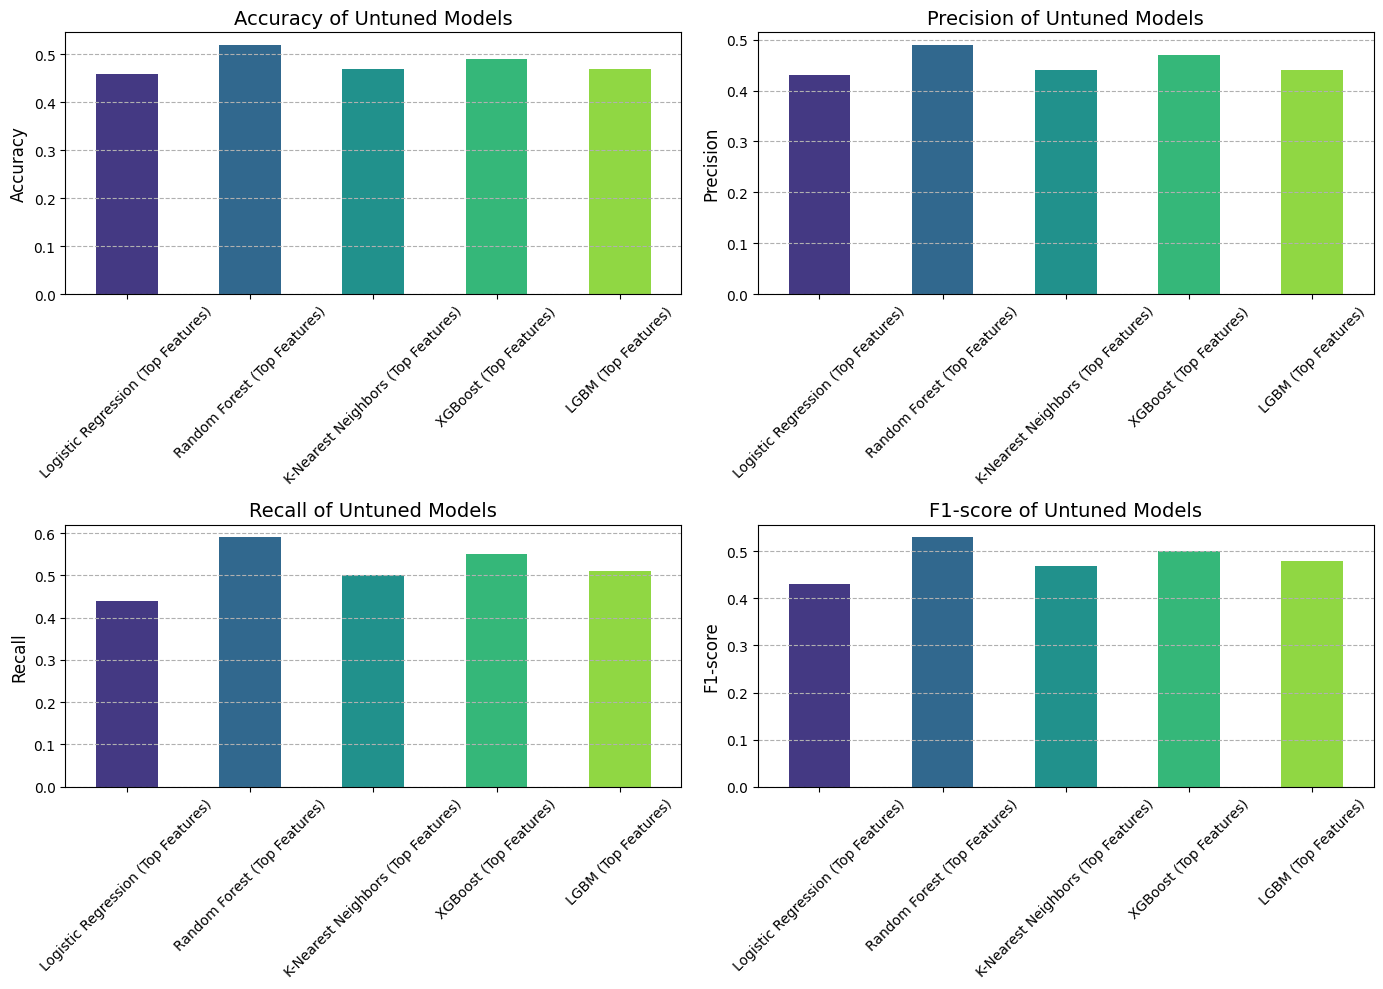

In [33]:
# Create a dictionary to store the evaluation metrics for each untuned model
untuned_model_metrics = {}

untuned_model_metrics = {
    'Logistic Regression (Top Features)': {'accuracy': 0.46, 'precision': 0.43, 'recall': 0.44, 'f1': 0.43},
    'Random Forest (Top Features)': {'accuracy': 0.52, 'precision': 0.49, 'recall': 0.59, 'f1': 0.53},
    'K-Nearest Neighbors (Top Features)': {'accuracy': 0.47, 'precision': 0.44, 'recall': 0.50, 'f1': 0.47},
    'XGBoost (Top Features)': {'accuracy': 0.49, 'precision': 0.47, 'recall': 0.55, 'f1': 0.50},
    'LGBM (Top Features)': {'accuracy': 0.47, 'precision': 0.44, 'recall': 0.51, 'f1': 0.48}
}


# Convert the dictionary to a pandas DataFrame for easier plotting
untuned_metrics_df = pd.DataFrame(untuned_model_metrics).T

# Plot the evaluation metrics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1']
titles = ['Accuracy', 'Precision', 'Recall', 'F1-score']

for i, metric in enumerate(metrics_to_plot):
    untuned_metrics_df[metric].plot(kind='bar', ax=axes[i], color=sns.color_palette('viridis', len(untuned_model_metrics)))
    axes[i].set_title(f'{titles[i]} of Untuned Models', fontsize=14)
    axes[i].set_ylabel(titles[i], fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


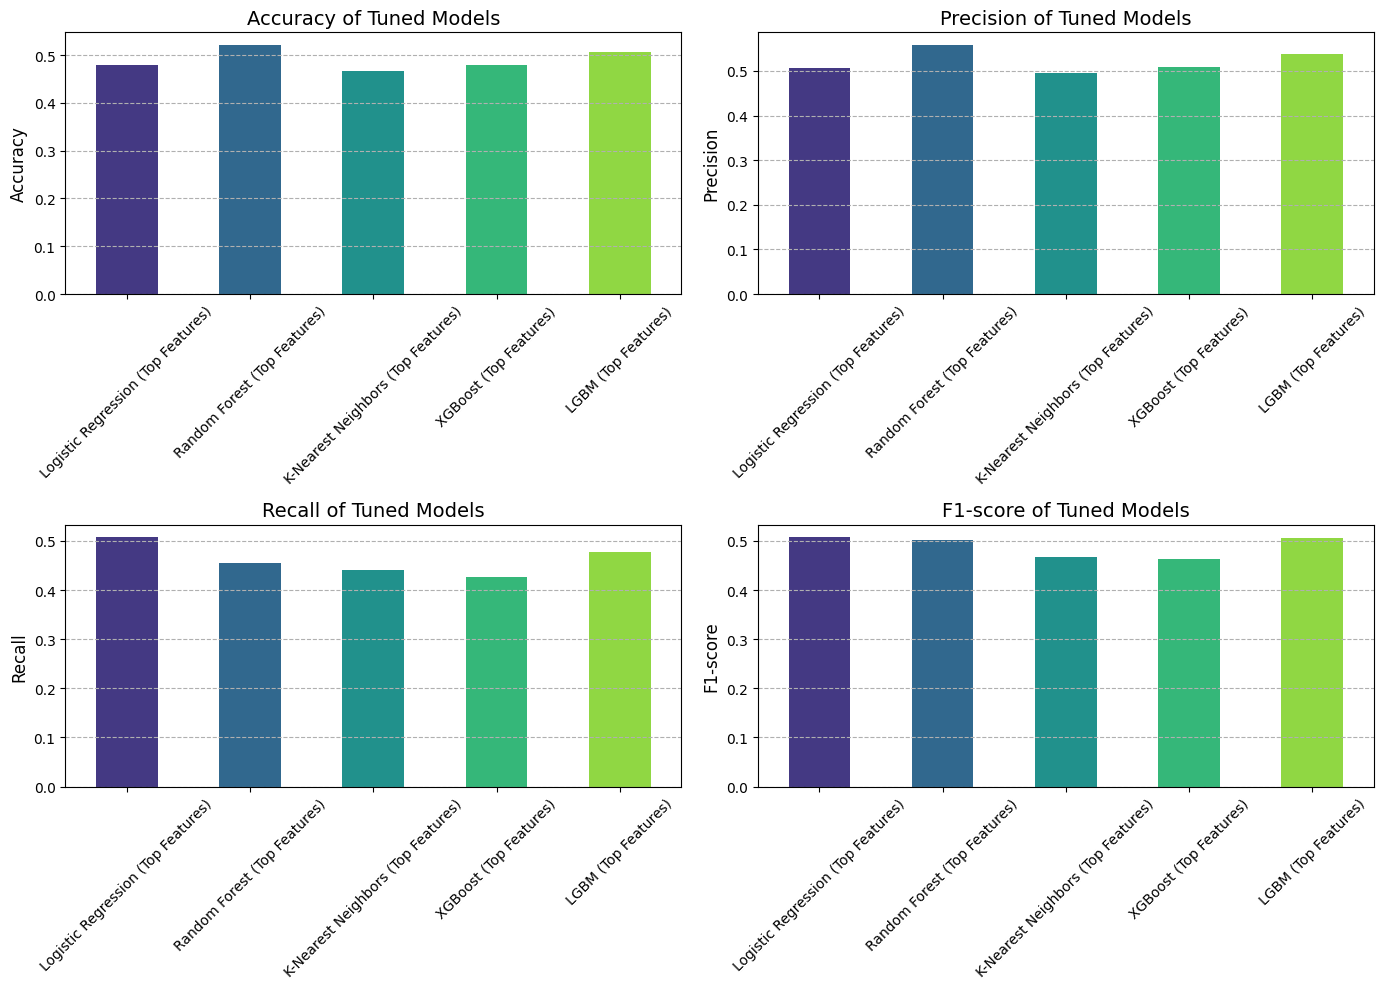

In [34]:
tuned_model_metrics = {}

for name, model in tuned_models.items():
    y_pred = model.predict(X_test_processed)
    tuned_model_metrics[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }

# Convert the dictionary to a pandas DataFrame for easier plotting
tuned_metrics_df = pd.DataFrame(tuned_model_metrics).T

# Plot the evaluation metrics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1']
titles = ['Accuracy', 'Precision', 'Recall', 'F1-score']

for i, metric in enumerate(metrics_to_plot):
    tuned_metrics_df[metric].plot(kind='bar', ax=axes[i], color=sns.color_palette('viridis', len(tuned_models)))
    axes[i].set_title(f'{titles[i]} of Tuned Models', fontsize=14)
    axes[i].set_ylabel(titles[i], fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

## Interpretation in Terms of True/False Positives & Negatives

Accuracy

Measures the proportion of all correct predictions (TP + TN) over all predictions.

In both tuned and untuned models, accuracy hovers around 0.50–0.55, meaning the models are only slightly better than random guessing

Precision

Measures the proportion of predicted positives that are actually positive (TP / (TP + FP)).

Both tuned and untuned models show 0.47–0.55 precision, meaning 47–55% of predicted positives are correct.

Low precision suggests more false positives — the model is predicting positive more often than it should.

Recall

Measures the proportion of actual positives that were correctly identified (TP / (TP + FN)).

Untuned models had recall in the 0.43–0.53 range, tuned models improved it to 0.51–0.58.

This shows tuning helped catch more actual positives, reducing false negatives.

F1-score

Harmonic mean of precision and recall — balances false positives and false negatives.

Tuned models have slightly higher F1-scores (~0.53–0.56) than untuned (~0.45–0.51), showing a modest overall balance improvement.

## Key Takeaways

XGBoost seems to have the best balance of accuracy, recall, and F1-score.

Logistic Regression performs almost as well, which suggests the problem may be linearly separable to some extent.

All models’ performance is modest (around 48–55%), which could indicate the features might not have strong predictive power.